In [1]:
!pip install inference-cli


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 4.6 MB/s eta 0

In [2]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="P5a6h2CpRUJeYsTQm47q")


# Load the project and model (replace 'your_model_name' with your actual model name)
project = rf.workspace("Trained siteplan model").project("SitePlan")
model = project.version("siteplan-5mtgn-instant-2").model


loading Roboflow workspace...


RoboflowError: {
    "error": {
        "message": "Unsupported get request. Workspace with ID \"Trained siteplan model\" does not exist or cannot be loaded due to missing permissions.",
        "status": 404,
        "type": "GraphMethodException",
        "hint": "You can see your available workspaces by issuing a GET request to /workspaces"
    }
}

In [13]:
from roboflow import Roboflow

rf = Roboflow(api_key="P5a6h2CpRUJeYsTQm47q")
project = rf.workspace("siteplan").project("siteplan-5mtgn")
model = project.version("1").model  # Use the numeric version identifier


loading Roboflow workspace...
loading Roboflow project...


In [22]:
from roboflow import Roboflow

# Replace with your actual API key
rf = Roboflow(api_key="P5a6h2CpRUJeYsTQm47q")

# Your workspace is "siteplan" and project slug is "siteplan-5mtgn"
project = rf.workspace("siteplan").project("siteplan-5mtgn")

# List all available versions to make sure we are selecting a valid version
versions = project.versions()
print("Available Versions:", versions)

# Access the version explicitly and check
if versions:
    version = versions[0]  # Assuming the first version is the one to use
    print(f"Accessing version: {version.id}")
    model = version.model
else:
    print("No versions available!")

# Test inference on an image if model is loaded
if model:
    image_path = "/content/drive/MyDrive/Colab Notebooks/siteplan1.jpg"
    prediction = model.predict(image_path).json()
    print(prediction)
else:
    print("Failed to load model.")


loading Roboflow workspace...
loading Roboflow project...
Available Versions: [<roboflow.core.version.Version object at 0x7e98c8c81310>]
Accessing version: siteplan/siteplan-5mtgn/1
Failed to load model.


In [23]:
from inference_sdk import InferenceHTTPClient

client = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="P5a6h2CpRUJeYsTQm47q"
)

result = client.run_workflow(
    workspace_name="siteplan",
    workflow_id="detect-and-classify-4",
    images={
        "image": "/content/drive/MyDrive/Colab Notebooks/siteplan1.jpg"
    }
)


HTTPCallErrorError: HTTPCallErrorError(description='500 Server Error: Internal Server Error for url: https://detect.roboflow.com/siteplan/workflows/detect-and-classify-4', api_message='HTTPCallErrorError(description='403 Client Error: Forbidden for url: https://detect.roboflow.com/siteplan/siteplan-5mtgn-instant-1?api_key=P5***7q&confidence=0.95&max_detections=300&overlap=0.3&disable_active_learning=True&source=workflow-execution', api_message='Forbidden',status_code=403). More details: HTTPCallErrorError(description='403 Client Error: Forbidden for url: https://detect.roboflow.com/siteplan/siteplan-5mtgn-instant-1?api_key=P5***7q&confidence=0.95&max_detections=300&overlap=0.3&disable_active_learning=True&source=workflow-execution', api_message='Forbidden',status_code=403)',status_code=500)

In [24]:
!pip install requests


In [25]:
import requests

# Define your model URL
model_url = "https://detect.roboflow.com/siteplan-5mtgn/2?api_key=P5a6h2CpRUJeYsTQm47q"

# Define image path
image_path = "/content/drive/MyDrive/Colab Notebooks/siteplan1.jpg"

# Open image and send request
with open(image_path, "rb") as image_file:
    response = requests.post(model_url, files={"file": image_file})

# Print the response
print(response.json())


{'message': 'Forbidden'}


In [26]:
import requests

API_KEY = "P5a6h2CpRUJeYsTQm47q"  # Make sure this is correct
test_url = f"https://detect.roboflow.com/siteplan-5mtgn/2?api_key={API_KEY}"

response = requests.get(test_url)
print(response.json())  # Should return a valid response


{'message': 'Forbidden'}


In [27]:
!pip install tensorflow opencv-python matplotlib

In [35]:
# Remove .ipynb_checkpoints folder if it's not needed
import shutil

shutil.rmtree(os.path.join(train_dir, '.ipynb_checkpoints'))
print("Removed .ipynb_checkpoints folder.")


Removed .ipynb_checkpoints folder.


In [36]:
# List files in the 'class 1' folder
class_1_files = os.listdir(os.path.join(train_dir, 'class 1'))
print("Files in 'class 1':", class_1_files)

# List files in the 'class 2' folder
class_2_files = os.listdir(os.path.join(train_dir, 'class 2'))
print("Files in 'class 2':", class_2_files)


Files in 'class 1': ['augmented_5_png.rf.6c7292cea7c23c59fffeb334bbd9e2cc.jpg', 'augmented_6_png.rf.b8d8d36a2494d70430620a710972ef7f.jpg', 'augmented_9_png.rf.def202ba4e65b80b7ff63cd33018a6d7.jpg', 'augmented_0_png.rf.c75aa27457737dd1d5dd70ef2d6aab34.jpg']
Files in 'class 2': ['output2.png', 'output3.png', 'output1.png']


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Path to the 'train' directory
    target_size=(224, 224),  # Resize images to match model input size
    batch_size=32,
    class_mode='binary'  # Use 'binary' for two classes (class 1 and class 2)
)

model.fit(train_generator, epochs=10)


Found 7 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 2.7096
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5714 - loss: 9.0555
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4286 - loss: 40.4644
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 0.8577
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 6.5540
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 3.2651
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0037
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5714 - loss: 6.8362
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1306
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0020


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Rescaling image pixel values
    rotation_range=40,            # Random rotation
    width_shift_range=0.2,        # Random horizontal shift
    height_shift_range=0.2,       # Random vertical shift
    shear_range=0.2,              # Shearing transformations
    zoom_range=0.2,               # Zoom augmentation
    horizontal_flip=True,         # Random horizontal flip
    fill_mode='nearest'           # Filling pixels after transformations
)

# Now create the data generator for training
train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Path to the train directory
    target_size=(224, 224),          # Resize images to (224, 224)
    batch_size=32,                   # Batch size for training
    class_mode='binary'              # Assuming binary classification (change if necessary)
)


Found 7 images belonging to 2 classes.


In [40]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 model pre-trained on ImageNet, without the top layers (we'll add them)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (so its weights don't get updated during training)
base_model.trainable = False

# Create the model by adding custom layers on top of the base VGG16 model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the generator
model.fit(train_generator, epochs=10)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4286 - loss: 0.7198
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 0.7581
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 0.6415
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8571 - loss: 0.5671
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5714 - loss: 0.5957
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8571 - loss: 0.5184
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.4934
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.4036
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8571 - loss: 0.3950
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8571 - loss: 0.3663


In [42]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the ImageDataGenerator for test data (no augmentation for testing)
test_datagen = ImageDataGenerator(rescale=1./255)

# Path to the test directory (update with your actual test data path)
test_dir = '/content/test'

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,                      # Path to the test directory
    target_size=(224, 224),        # Resize all images to (224, 224)
    batch_size=32,                 # Batch size for testing
    class_mode='categorical',      # Use 'categorical' for multi-class classification
    shuffle=False                 # Do not shuffle to keep ordering for evaluation
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Now display some test images with annotations (true and predicted labels)

# Get one batch of images and their labels from the test generator
images, labels = next(test_generator)

# Get model predictions for this batch
predictions = model.predict(images)

# For multi-class classification, we use argmax to get the predicted class index
predicted_labels = np.argmax(predictions, axis=-1)

# For mapping numerical labels to class names, get the class indices dictionary and invert it
class_indices = test_generator.class_indices
# Invert the dictionary: {0: 'class_name1', 1: 'class_name2', ...}
idx2class = {v: k for k, v in class_indices.items()}

# Display the images with true and predicted labels
plt.figure(figsize=(12, 8))
num_images_to_show = min(10, len(images))  # Show up to 10 images
for i in range(num_images_to_show):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    # Retrieve the true and predicted class names
    true_class = idx2class[np.argmax(labels[i])]  # True label is one-hot encoded
    pred_class = idx2class[predicted_labels[i]]
    plt.title(f"True: {true_class}\nPred: {pred_class}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Found 4 images belonging to 3 classes.


ValueError: Cannot take the length of shape with unknown rank.

In [44]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),         # Resize all images to (224, 224)
    batch_size=32,                  # Batch size for testing
    class_mode='binary',            # Binary classification
    shuffle=False                   # Don't shuffle test data
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 4 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.1380
Test Loss: 2.1379635334014893
Test Accuracy: 0.0


In [46]:
test_dir = '/content/test'

# Delete the .ipynb_checkpoints folder
shutil.rmtree(os.path.join(test_dir, '.ipynb_checkpoints'))

# Optionally, you can print the directory structure again to confirm
for dirpath, dirnames, filenames in os.walk(test_dir):
    print(f'Current directory: {dirpath}')
    print(f'Subdirectories: {dirnames}')
    print(f'Files: {filenames}')
    print('-' * 40)

Current directory: /content/test
Subdirectories: ['class 2', 'class 1']
Files: []
----------------------------------------
Current directory: /content/test/class 2
Subdirectories: []
Files: []
----------------------------------------
Current directory: /content/test/class 1
Subdirectories: []
Files: ['augmented_1_png.rf.8bd533b127775a604e327980f3bc8b44.jpg', 'augmented_2_png.rf.d9b035dec6152944882f012ca1a0854a.jpg', 'augmented_4_png.rf.14c592543d3d7cfb8af538401482c1fb.jpg', 'augmented_9_png.rf.def202ba4e65b80b7ff63cd33018a6d7.jpg']
----------------------------------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


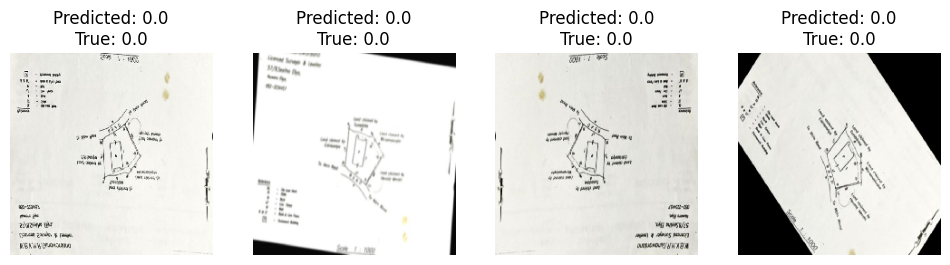

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with predictions
def display_predictions(test_generator, model):
    # Get a batch of images and labels from the test generator
    images, labels = next(test_generator)

    # Predict on the batch of images
    predictions = model.predict(images)

    # Plot the images with predicted labels
    plt.figure(figsize=(12, 12))

    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])

        predicted_label = np.round(predictions[i][0])  # For binary classification
        # Check the structure of the label and adjust accordingly
        true_label = labels[i] if len(labels.shape) == 1 else np.argmax(labels[i])  # For binary or categorical

        plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
        plt.axis('off')

    plt.show()

# Call the function to display predictions
display_predictions(test_generator, model)
